# Reproducing experiment from Hruskal 2022

Reproducing histograms and various technical experiments from the paper : Hruska, E., Zhao, L. & Liu, F. Ground truth explanation dataset for chemical property prediction on molecular graphs. ChemRxiv (2022).

In [21]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Importing explainability datasets
atom_df = pd.read_csv("ground-truth-explainability-PCQM4Mv2-atomwise.csv")
bond_df = pd.read_csv("ground-truth-explainability-PCQM4Mv2-bondwise.csv")
print(atom_df.shape)
atom_df.head()

(3619970, 5)


,molecule index,operation index,atom index,paired molecule index,explanation value
0,3,0,13,2213220,-0.201364
1,7,1,1,2213226,-0.400007
2,10,0,7,34507,0.285720
3,20,0,12,3359972,-0.010885
4,21,1,0,3123855,0.027211


In [23]:
print(bond_df.shape)
bond_df.head()

(1555262, 5)


,molecule index,operation index,bond index,paired molecule index,explanation value
0,14,2,11,2213255,-0.919745
1,23,3,5,3111831,0.040817
2,24,3,4,2907660,0.527901
3,36,3,7,1668630,-0.402728
4,38,3,4,1894401,-0.187759


In [32]:
PCQM4Mv2_train_n_molecules = 3378606

In [25]:
atom_values_per_mol = atom_df.groupby("molecule index").count()["explanation value"].value_counts()
atom_values_per_mol = pd.concat([pd.Series([PCQM4Mv2_n_molecules-sum(atom_values_per_mol)]),atom_values_per_mol])
atom_values_per_mol /= PCQM4Mv2_n_molecules

bond_values_per_mol = bond_df.groupby("molecule index").count()["explanation value"].value_counts()
print(bond_df.groupby("molecule index").count().index)
bond_values_per_mol = pd.concat([pd.Series([PCQM4Mv2_n_molecules-sum(bond_values_per_mol)]),bond_values_per_mol])
bond_values_per_mol /= PCQM4Mv2_n_molecules

print(bond_values_per_mol*100)

Int64Index([     14,      23,      24,      36,      38,      44,      50,
                 51,      52,      66,
            ...
            3378557, 3378561, 3378565, 3378566, 3378580, 3378595, 3378596,
            3378601, 3378602, 3378605],
           dtype='int64', name='molecule index', length=783788)
0     79.080131
1     10.741148
2      4.447048
3      3.048081
4      1.537786
5      0.638255
6      0.299897
7      0.122777
8      0.051673
9      0.021406
10     0.007660
11     0.002402
12     0.001361
13     0.000294
14     0.000080
dtype: float64


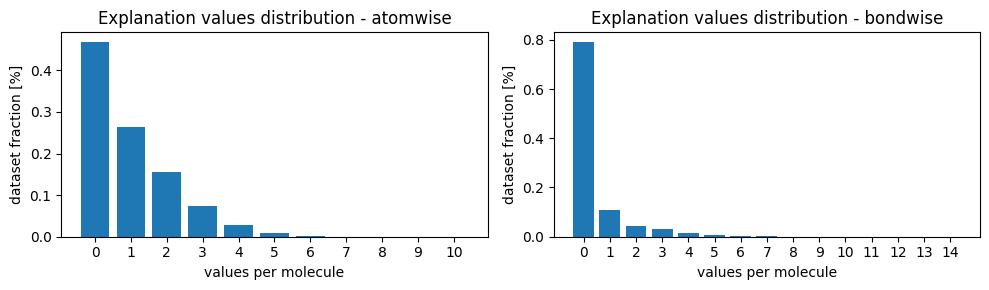

In [31]:
fig, ax = plt.subplots(ncols=2,figsize=(10,3))
for i,data in enumerate([atom_values_per_mol,bond_values_per_mol]):
    ax[i].bar(data.index,data.values)
    ax[i].set_xticks(data.index);
    ax[i].set_xlabel("values per molecule")
    ax[i].set_ylabel("dataset fraction [%]")
    title = (1-i)*"atomwise" + i*"bondwise"
    ax[i].set_title("Explanation values distribution - "+title)
fig.tight_layout()
fig.savefig("./hruska_expl_distribution.png")
#atom_values_per_mol.plot.bar(title="Distribution of explanation values in the dataset - Atomwise",
#                             ylabel="dataset fraction",
#                             xlabel="values per molecule",
#                             figsize=(10,5));

In [28]:
from ogb.lsc import PCQM4Mv2Dataset
dataset = PCQM4Mv2Dataset(root = '../../data/', only_smiles = True)

In [29]:
# Value of the chemical property for each molecule of the dataset
prop_values=[]
for dat in dataset:
    prop_values.append(dat[1])
prop_values_arr=np.array(prop_values)
atom_prop_values_arr = prop_values_arr[atom_df["molecule index"]]
atom_prop_values_arr
atom_df["HOMO-LUMO gap [eV]"] = atom_prop_values_arr.T

In [30]:
len(prop_values_arr)

3746620

In [55]:
atom_df.head()

,molecule index,operation index,atom index,paired molecule index,explanation value,HOMO-LUMO gap [eV]
0,3,0,13,2213220,-0.201364,4.492600
1,7,1,1,2213226,-0.400007,4.242255
2,10,0,7,34507,0.285720,4.174226
3,20,0,12,3359972,-0.010885,4.100756
4,21,1,0,3123855,0.027211,5.994668


In [ ]:
#sns.kdeplot(data=atom_df, x="explanation value",y="HOMO-LUMO gap [eV]")
# too long

# Getting the indexes for testing

In [33]:
suppl = Chem.SDMolSupplier('pcqm4m-v2-train.sdf')
for idx, mol in enumerate(suppl):
    print(f'{idx}-th rdkit mol obj: {mol}')

NameError: name 'Chem' is not defined